# 第十次课后练习 之二（选做）

**负责助教：朱轩宇**

<span style="color:red; font-weight:bold;">请将作业文件命名为 第十次课后练习-选做题+姓名+学号.ipynb, 例如 第十次课后练习-选做题+张三+1000000000.ipynb</span>

# 社交媒体评论主题分析与可视化

## 引言
在信息化社会背景下，社交媒体平台成为了人们表达情感、分享观点的重要渠道。通过对社交媒体评论进行情感分析，可以深入了解用户的态度和情感趋势，为市场策略、用户体验优化等提供有力支持。本文将详细介绍如何使用Python进行社交媒体评论的情感分析，并结合数据可视化技术，将分析结果直观地呈现出来。

## 实验步骤
1. 数据清洗
   - 使用pandas读取数据文件，并进行数据清洗和预处理，包括去除重复值、正则清洗和分词。
2. 主要关注点分析
   - 计算词频并生成词云图，统计文本中词语的出现频率，并使用WordCloud库生成词云图展示结果。
3. 主题分析
   1. 进行一致性和困惑度计算，通过改变主题数量范围，计算不同主题数量下的一致性和困惑度，并绘制折线图展示结果。
   2. 使用TF-IDF模型提取文本的关键词，计算每个关键词在文本中的权重，并输出前30个关键词。
   3. 进行主题建模和关键词提取，使用LDA模型对分词结果进行主题建模，并提取每个主题的关键词。
   4. 对主题建模结果进行可视化，使用pyLDAvis库生成LDA主题模型的可视化结果，并保存为HTML文件。
   5. 聚类分析

实验提供了两份数据，一个比较大，一个比较小，可以先使用小数据跑通之后换更大的数据运行。

### 实验使用的关键库及版本
python 3.10
- jieba                     0.42.1
- numpy                     1.26.4
- pandas                    2.2.3
- pyLDAvis                  3.4.1
- scikit-learn              1.6.1
- seaborn                   0.13.2


## 1. 数据清洗

In [2]:
import os
import pandas as pd
import re
import jieba
import jieba.posseg as psg

In [3]:
# 使用pandas读取数据文件，并进行数据清洗和预处理，包括去除重复值、正则清洗和分词。
print("Loading data...")
data=pd.read_csv("./data/doc_ewujushi_short.csv")
stopword_list = []
with open("./stop_dic/stopwords.txt", "r", encoding="utf-8") as f:
    for line in f:
        stopword_list.append(line.strip())  # 去除换行符和空格
stopwords = set(stopword_list)

# 定义分词函数
def chinese_word_cut(mytext):
    ##############################
    # TODO 
    # 定义分词函数，实现去除非中文字符和停用词
    mytext = re.sub(r'[^\u4e00-\u9fa5]', '', mytext) # 去除非中文字符
    words = psg.cut(mytext) # 使用jieba进行分词
    # 要获得词性标注（下面是word, flag in words），因此使用jieba.posseg.cut！！！
    ##############################
    return " ".join([word for word, flag in words if word not in stopwords])  # 去除停用词

# 对数据进行处理
print("Processing data...")
##############################
# TODO 
# 对数据进行处理，包括去除重复值、缺失值以及重置索引
  # 去除重复值
data = data.drop_duplicates()
  # 去除缺失值
data = data.dropna(subset = ["content"])
  # 重置索引
data = data.reset_index(drop = True)
##################################

print("Cleaning data...")
data["content_cutted"] = data.content.apply(chinese_word_cut)

Building prefix dict from the default dictionary ...


Loading data...
Processing data...
Cleaning data...


Dumping model to file cache /var/folders/hn/gy9cbfnj2fxdtcx87x8ptv_w0000gn/T/jieba.cache
Loading model cost 0.215 seconds.
Prefix dict has been built successfully.


## 2. 探索性数据分析(词频分析)

In [4]:
word_count = {}
for index, row in data.iterrows():
    words = row["content_cutted"].split()
    for word in words:
        if word not in word_count:
            word_count[word] = 1
        else:
            word_count[word] += 1

# 排序
word_count_sorted = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
# 筛选高频词
high_frequency_num = 10  # 设定筛选的高频词数量
high_frequency_words = []
##############################
# TODO 
# 筛选高频词
high_frequency_words = [word for word, count in word_count_sorted if count > high_frequency_num]
##############################
high_frequency_words

['俄',
 '乌克兰',
 '乌',
 '局势',
 '俄罗斯',
 '美国',
 '博',
 '微',
 '转发',
 '说',
 '普京',
 '日',
 '视频',
 '市场',
 '拜登',
 '总统',
 '微博',
 '关注',
 '写',
 '月',
 '落魄',
 '三叔',
 '新闻',
 '蓝光',
 '之间',
 '战争',
 '狗',
 '挺好',
 '中国',
 '猫',
 '黄金',
 '称',
 '入侵',
 '紧张',
 '影响',
 '快转微',
 '欧洲',
 '全文',
 '边境',
 '北约',
 '国家',
 '美',
 '持续',
 '地区',
 '指数',
 '乌东',
 '悲允',
 '紧张局势',
 '历史',
 '升级',
 '中',
 '看完',
 '时间',
 '央视',
 '东部',
 '股',
 '篇',
 '国际',
 '演讲稿',
 '圈',
 '前',
 '苏联',
 '值得一看',
 '解读',
 '下跌',
 '年',
 '制裁',
 '全球',
 '更多',
 '介绍',
 '早上',
 '橙',
 '圈橙',
 '跌',
 '股市',
 '简要',
 '发生',
 '西方',
 '军事',
 '冲突',
 '原油',
 '世界',
 '回头',
 '美元',
 '危机',
 '想',
 '经济',
 '美股',
 '报道',
 '震荡',
 '做',
 '时',
 '政治',
 '悲',
 '跌幅',
 '消息',
 '情况',
 '上涨',
 '承认',
 '独立',
 '二哈',
 '和平',
 '威胁',
 '点',
 '最新进展',
 '计划',
 '风险',
 '鲜花',
 '天然气',
 '事件',
 '油价',
 '加息',
 '吃',
 '背后',
 '发表',
 '政策',
 '直播',
 '哈哈哈',
 '军队',
 '希望',
 '变化',
 '武装',
 '预期',
 '板块',
 '新',
 '教授',
 '结束',
 '顿涅茨克',
 '允',
 '反弹',
 '超',
 '金灿荣',
 '情绪',
 '太',
 '行情',
 '走',
 '链接',
 '民族',
 '今日',
 '思考',
 '最新',
 '连斯基',
 '避险',
 '基辅',
 '喵',
 

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/var/folders/hn/gy9cbfnj2fxdtcx87x8ptv_w0000gn/T/ipykernel_12028/3263753274.py:23: UserWarning: Glyph 20420 (\N{CJK UNIFIED IDEOGRAPH-4FC4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/var/folders/hn/gy9cbfnj2fxdtcx87x8ptv_w0000gn/T/ipykernel_12028/3263753274.py:23: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/hn/gy9cbfnj2fxdtcx87x8ptv_w0000gn/T/ipykernel_12028/3263753274.py:23: UserWarning: Glyph 20811 (\N{CJK UNIFIED IDEOGRAPH-514B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/hn/gy9cbfnj2fxdtcx87x8ptv_w0000gn/T/ipykernel_12028/3263753274.py:23: UserWarning

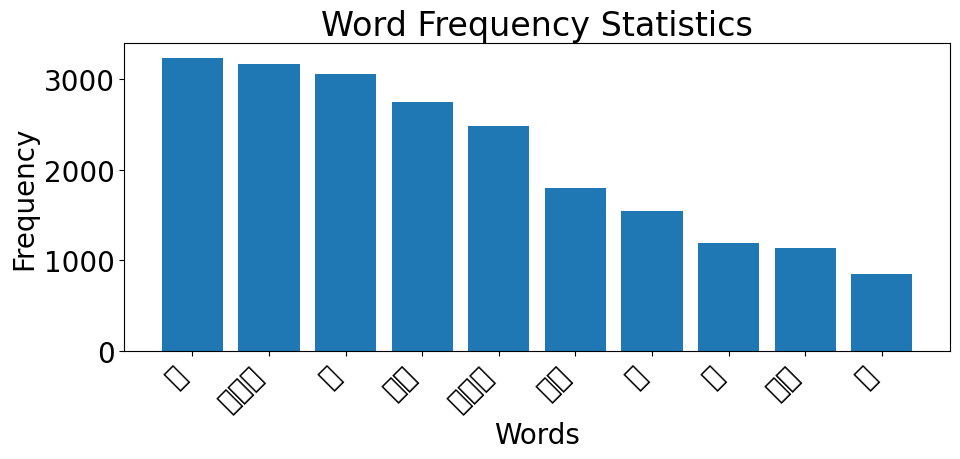

In [64]:
# 可视化展示
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 中文 字体设置
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 
plt.rcParams.update({'font.size': 20}) # 设置字体大小

##############################
# TODO 
# 生成词频统计图，取前10个高频词
high_frequency_words_to_draw = word_count_sorted[:10] # 取前10个高频词

words_to_draw = [word for word, freq in high_frequency_words_to_draw]
frequecy_to_draw = [freq for word, freq in high_frequency_words_to_draw]
plt.figure(figsize=(10, 5))
plt.bar(words_to_draw, frequecy_to_draw) # TODO
plt.xticks(rotation=45, ha="right")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Statistics")
plt.tight_layout()
plt.show()
##############################

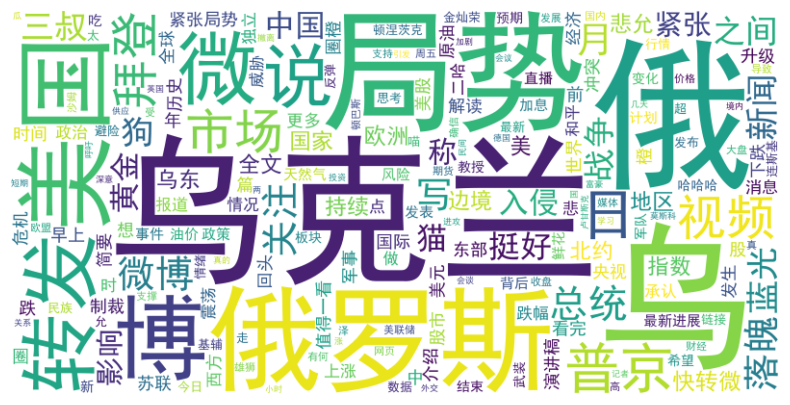

In [15]:
##############################
# TODO 
# 生成词云图
wordcloud = WordCloud(font_path = "simhei.ttf", background_color = "white", width = 800, height = 400).generate_from_frequencies(dict(word_count_sorted))
##############################
# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3. LDA主题分析

In [73]:
# LDA主题模型分析
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

##############################
# TODO 
# 使用CountVectorizer进行文本向量化
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["content_cutted"])

# 设定LDA模型参数，并进行拟合
n_components = 5  # 主题数量
lda = LatentDirichletAllocation(n_components = n_components)
lda.fit(X)
##############################

# 输出主题词
def print_top_words(model, feature_names, n_top_words):
    tword = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        topic_w = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        tword.append(topic_w)
        print(topic_w)
    return tword

n_top_words = 25
tf_feature_names = vectorizer.get_feature_names_out()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
转发 局势 关注 新闻 解读 央视 美国 直播 发生 微博 背后 视频 最新进展 乌东 有何 变化 沙姆 雄狮 军事 深意 乌克兰 嘻嘻 中国 战争 事件
Topic #1:
乌克兰 俄罗斯 美国 局势 拜登 总统 普京 入侵 视频 战争 悲允 微博 边境 北约 国家 东部 新闻 西方 地区 制裁 报道 中国 危机 时间 紧张
Topic #2:
局势 市场 黄金 俄罗斯 影响 普京 乌克兰 美国 原油 指数 股市 欧洲 美元 全球 紧张局势 紧张 持续 油价 天然气 上涨 加息 预期 升级 震荡 跌幅
Topic #3:
落魄 三叔 蓝光 挺好 之间 快转微 全文 看完 值得一看 演讲稿 早上 圈橙 介绍 更多 简要 回头 鲜花 板块 局势 历史 下跌 超话 个股 大盘 学习
Topic #4:
二哈 苏联 教授 金灿荣 中国 思考 民族 局势 黄鱼 政策 结束 闭幕式 哈哈哈哈 曾阿牛 牛叔 政治 赞赞 冬奥会 乌克兰 全文 微博 学习 关注 普京 程老


In [ ]:
import numpy as np

# X = X.toarray()
topics=lda.transform(X)
topic = []
##############################
# TODO 
# 得到每篇文章对应主题
columns = [f'P(topic {i})' for i in range(len(lda.components_))]
df = pd.DataFrame(topics, columns=columns)
display(df)
# 取主题概率最大的主题作为文章的主题
topic = [np.argmax(t) for t in topics] # 用argmax取出每行最大值的索引！！！

# 另一种写法：
"""
for t in topics: topic.append(list(t).index(np.max(t)))
"""
##############################
data['topic']=topic 
data

,P(topic 0),P(topic 1),P(topic 2),P(topic 3),P(topic 4)
0,0.254465,0.020268,0.684394,0.020863,0.020010
1,0.003736,0.417768,0.003728,0.571016,0.003752
2,0.987545,0.003082,0.003187,0.003082,0.003104
3,0.003592,0.595095,0.079567,0.318276,0.003471
4,0.988766,0.002782,0.002869,0.002782,0.002800
...,...,...,...,...,...
8413,0.050695,0.050308,0.522072,0.326348,0.050576
8414,0.189519,0.230598,0.022370,0.280893,0.276620
8415,0.100000,0.100000,0.600000,0.100000,0.100000
8416,0.008336,0.008367,0.008334,0.966629,0.008333


,author,content,content_cutted,topic
0,长春情报站,#北京2022年冬奥会#中国式排座#俄乌局势#L长春情报站的微博视频,北京 年 冬奥会 中国式 排座 俄 乌 局势 长春 情报站 微博 视频,2
1,看看新闻全球眼,【#俄军演当天拜登要求公民赶紧离开乌克兰#】2月10日，俄罗斯与白俄罗斯启动了为期10天的联...,俄军 演 当天 拜登 公民 赶紧 离开 乌克兰 月 日 俄罗斯 白俄罗斯 启动 为期 天 联...,3
2,-夏明世-,伊朗原油供应回归可能及美元反弹制约油价上行空间但OPEC增产不及预期、库存下降和俄乌紧张局势...,伊朗 原油 供应 回归 美元 反弹 制约 油价 上行 空间 增产 不及 预期 库存 下降 俄...,0
3,Ruptly国际新闻视频通讯社,【英国首相最近有点忙，#约翰逊在波兰和比利时谈俄乌紧张局势#】周四，英国首相鲍里斯·约翰逊在...,英国首相 忙 约翰逊 波兰 比利时 谈 俄 乌 紧张局势 周四 英国首相 鲍里斯 约翰逊 华...,1
4,凡尘论市168,【成本支撑叠加装置检修，PTA短线高位将有震荡反复】伊朗原油供应回归可能及美元反弹制约油价上...,成本 支撑 叠加 装置 检修 短线 高位 震荡 反复 伊朗 原油 供应 回归 美元 反弹 制...,0
...,...,...,...,...
8413,黄昏_Tasogare,这个演讲稿的水平确实高,演讲稿 水平 确实 高,2
8414,卡飒不拦卡,听说是普京同学自己写的 全文看完 很感慨 值得多看几遍,听说 普京 同学 写 全文 看完 感慨 值得 几遍,3
8415,老乌课堂,转发微博,转发 微 博,2
8416,夏池0615,//<a href=/n/赵脱俗>@赵脱俗</a>:学习一下//<a href=/n/来去之...,赵 脱俗 赵 脱俗 学习 之间 之间 回头 猫 狗 猫 狗 写 挺好 说 落魄 三叔 落魄 ...,3


In [55]:
topics[0]#可以看出属于第几个话题的概率

array([0.25446481, 0.02026807, 0.68439403, 0.02086338, 0.02000971])

## 可视化

In [6]:
import pyLDAvis
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()                                  #在notebook中展示   
pic = pyLDAvis.lda_model.prepare(lda, X, vectorizer)
pyLDAvis.save_html(pic, 'lda_pass'+str(n_components)+'.html')

NameError: name 'lda' is not defined

## 困惑度分析

In [5]:
import matplotlib.pyplot as plt
plexs = []
scores = []
n_max_topics = 10
#################################
# TODO
# 计算困惑度和对数似然函数
for i in range(1,n_max_topics):
    print('正在进行第',i,'轮计算')
    lda = LatentDirichletAllocation(n_components = i, max_iter = 50, random_state = 0)
    lda.fit(X)
    plexs.append(lda.perplexity(X))
    scores.append(lda.score(X))
#################################

正在进行第 1 轮计算


NameError: name 'LatentDirichletAllocation' is not defined

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

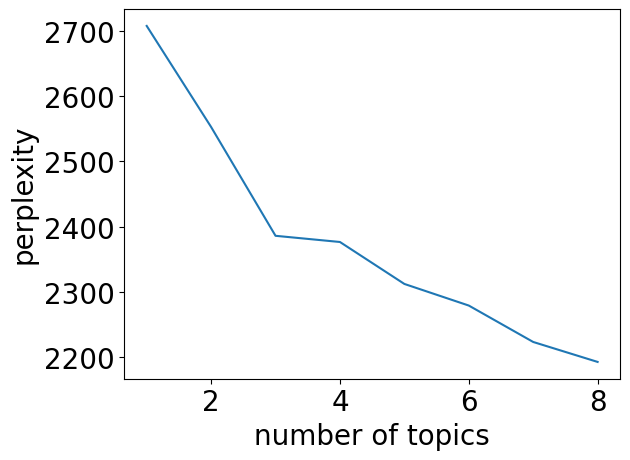

In [59]:
n_t=9                                      #区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t))
plt.plot(x,plexs[1:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not foun

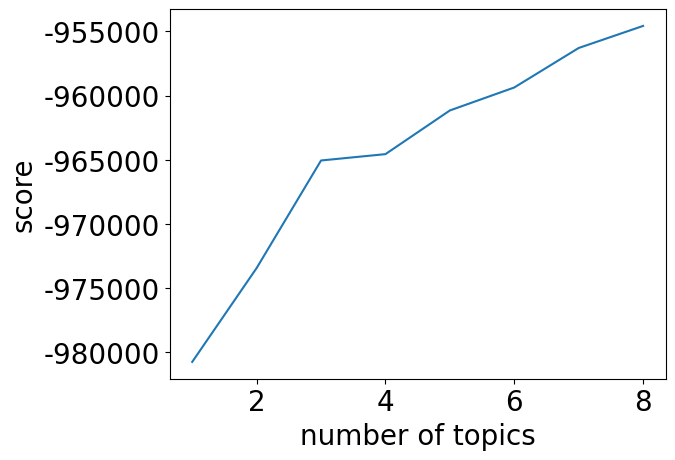

In [63]:
n_t=9                                         #区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t))
plt.plot(x,scores[1:n_t])
plt.xlabel("number of topics")
plt.ylabel("score")
plt.show()

## 4. 聚类分析

Cluster 0: 教授, 金灿荣, 闭幕式, 结束, 新闻频道, 酒花, 频道, 军事, 走开, 播出
Cluster 1: 转发, 大陆, 大饼, 大麦, 天上, 天下, 天下太平, 天堂, 天天, 天气
Cluster 2: 快转微, 乌克兰, 局势, 俄罗斯, 美国, 悲允, 普京, 三叔, 落魄, 蓝光


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

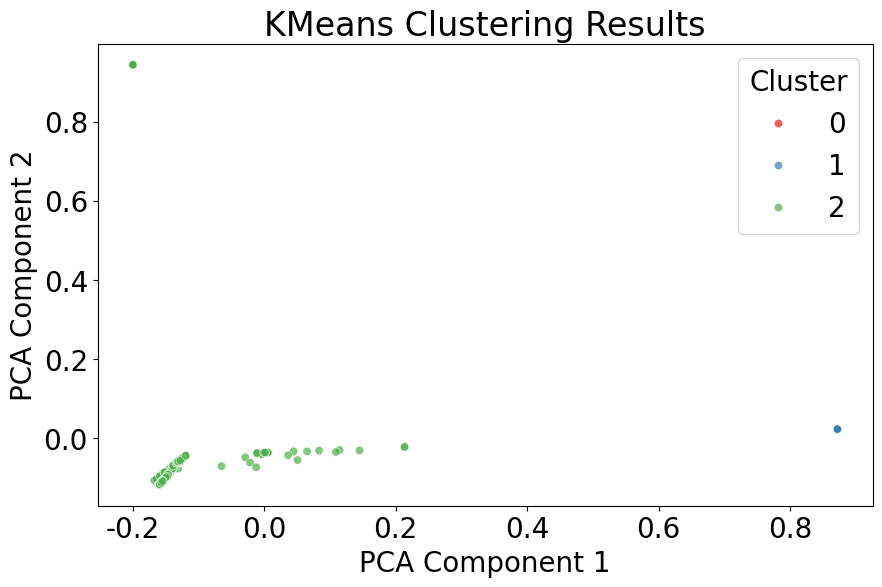

In [ ]:
# 聚类分析
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 使用TF-IDF方法表示文本特征
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")
X = vectorizer.fit_transform(data["content_cutted"])

# 设定KMeans聚类参数
n_clusters = 3  # 聚类数量
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)

# 获取每个聚类的关键特征
def get_top_keywords(model, feature_names, n_top_words):
    
    top_keywords = []
    ##############################
    # TODO 
    # 实现函数，获取每个聚类的关键特征
    # 通过聚类中心的特征值来获取每个聚类的关键词
    for center in model.cluster_centers_: # model.cluster_centers_表示聚类中心！
        idx = center.argsort()[:-n_top_words - 1:-1] # argsort()返回数组值从小到大的索引!!!!!所以这里取反过来的前n个，取出前n_top_words个最大的特征
        top_keywords.append([feature_names[j] for j in idx])

    ##############################
    return top_keywords

top_keywords = get_top_keywords(kmeans, vectorizer.get_feature_names_out(), 10)
for i, keywords in enumerate(top_keywords):
    print(f"Cluster {i}: {', '.join(keywords)}")

# 获取每个样本所属的聚类
data["cluster"] = kmeans.labels_
data["cluster"].value_counts()  # 查看每个聚类的样本数量

# 降维和可视化
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

##############################
# TODO 
# 使用PCA降维到2维
pca = PCA(n_components = 2) #
X_pca = pca.fit_transform(X.toarray())
##############################

# 创建DataFrame用于可视化
df = pd.DataFrame(X_pca, columns=["x", "y"])
df["cluster"] = data["cluster"]
df["topic"] = data["topic"]
# 可视化聚类结果
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="x", y="y", hue="cluster", palette="Set1", alpha=0.7)
plt.title("KMeans Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


### 请合理使用AI工具对上述媒体内容进行综述，给出你的步骤（调用方案）以及提示词和结果。

结果示例：

国际局势动荡下的全球经济与市场反应
——乌克兰危机升级，避险情绪推高黄金原油价格

近期，乌克兰局势持续紧张，俄罗斯与西方国家的对峙进一步升级，引发全球市场剧烈震荡。据央视新闻报道，乌克兰东部地区冲突加剧，美国总统拜登与北约盟国宣布对俄罗斯实施新一轮经济制裁，导致国际油价和黄金价格大幅上涨。

市场影响

能源市场：受紧张局势影响，布伦特原油价格突破每桶100美元，欧洲天然气价格飙升。分析人士指出，俄罗斯作为全球主要能源出口国，若冲突持续，可能进一步扰乱供应链。

避险资产：黄金价格创下近8个月新高，美元指数走强。金灿荣教授在接受采访时表示，市场避险情绪浓厚，投资者纷纷转向黄金等安全资产。

股市震荡：美股三大指数集体下跌，纳指跌幅超2%。A股市场同样受到波及，沪指失守3500点。

国际反应
俄罗斯总统普京在公开讲话中指责北约东扩威胁国家安全，而乌克兰政府则呼吁国际社会提供更多支持。微博上，#乌克兰局势#话题阅读量突破10亿，网友热议战争风险与全球政治格局变化。

社交媒体动态
与此同时，国内社交媒体呈现两极分化：

严肃讨论：部分用户转发央视新闻、专家解读，关注事件对经济的影响（如“黄金要不要现在买入？”）。

娱乐化消解：另一部分网友以“二哈表情包”“哈哈哈”调侃紧张氛围，甚至将普京称为“雄狮”，形成“悲允”式黑色幽默。

文化视角
在文学社区，有读者推荐三叔的《落魄》全文，称其“值得一看”，并关联当前局势：“历史总是惊人相似，如同苏联解体时的沙姆事件。”

编辑评述
本次乌克兰危机不仅是地缘政治冲突，更是一场全球经济的压力测试。从市场反应看，能源与金融市场的波动揭示了全球化时代危机的传导性。值得注意的是，社交媒体上的分裂态度——严肃关注与娱乐化解构并存，反映了公众对复杂议题的多元应对策略。

建议投资者：

短期关注避险资产（黄金、美元），但警惕高位回调风险；

长期需观察俄乌谈判进展及美联储政策变化。

社会观察：当“普京”与“二哈”同屏出现时，我们或许该思考：娱乐化表达是缓解焦虑的方式，还是对严肃议题的消解？

In [ ]:
import requests
import json
import os
import openai

API_ENDPOINT = "https://api.deepseek.com/v1/chat/completions"
API_KEY = "<API-KEY>" # 替换成我的api-key后可以成功运行，结果在下面

def generate_summary(text: str, keywords: list) -> str:
    """
    调用 DeepSeek API 生成综述(结合LSI关键词优化提示词)
    :param text: 需要总结的社交媒体评论文本
    :param keywords: LSI 关键词列表
    :return: AI 生成的综述
    """
    try:
        headers = {
            "Authorization": f"Bearer {API_KEY}",
            "Content-Type": "application/json"
        }
        
        prompt = f"""你是有10年经验的社会化媒体数据分析师。请总结以下社交媒体评论，提取主要观点和核心主题。 
        结合以下关键词来分析内容：{', '.join(keywords)}。
        总结时，请明确用户关注的主要话题，并按照不同观点进行分类。
        """
        
        data = {
            "model": "deepseek-chat",
            "messages": [
                {"role": "system", "content": prompt},
                {"role": "user", "content": text}
            ]
        }

        response = requests.post(API_ENDPOINT, json=data, headers=headers)
        response_data = response.json()

        if response.status_code == 200:
            return response_data['choices'][0]['message']['content']
        else:
            print(f"API Error: {response_data}")
            return "Failed to generate summary"
    except Exception as e:
        print(f"Error calling DeepSeek API: {e}")
        return "Failed to generate summary"
    
current_data = data.head(15) # 因此我的deepseek-api的token限制65536，所以只考虑前面几条!!!!!
if isinstance(current_data, pd.DataFrame):
    social_media_text = "\n".join(current_data.astype(str).apply(" ".join, axis=1))  #DataFrame转换为字符串
else:
    social_media_text = str(current_data)

summary = generate_summary(social_media_text, topic_word)

print("\n AI 生成的社交媒体评论综述：\n")
print(summary)



 AI 生成的社交媒体评论综述：

根据提供的社交媒体评论内容，我将从不同角度对主要观点和核心主题进行分类总结：

一、地缘政治局势分析
1. 俄乌紧张局势：
- 俄罗斯与白俄罗斯联合军演引发西方担忧（关键词：军演、边境、北约）
- 美国要求公民撤离乌克兰（拜登、警告、撤离）
- 马克龙穿梭外交体现美欧分歧（法国、戴高乐、内卷）

2. 大国博弈：
- 美俄对峙被形容为"扎金花"博弈（加码、开牌）
- 历史视角：需了解乌克兰历史及大国博弈（东欧、疆域变化）
- 中国网民观点：认为这是西方自导自演的闹剧（自导自演、闹剧）

二、经济影响分析
1. 能源市场：
- 俄乌局势推高原油价格（原油、油价、天然气）
- OPEC增产不及预期加剧供应紧张（库存、支撑）
- 全球市场震荡（股市、黄金、美元）

2. 产业影响：
- PTA等化工品受成本支撑（装置检修、聚酯）
- 供应链扰动（宁波逸盛、停车检修）

三、媒体传播特征
1. 报道角度：
- 央视/凤凰等主流媒体侧重局势解读（央视、直播、深意）
- 微博平台呈现多元化观点（嘻嘻、悲允、哈哈哈）
- 视频成为主要传播形式（视频、秒拍）

2. 叙事框架：
- 历史框架：引用苏联历史（苏联、加盟共和国）
- 经济框架：分析市场波动（指数、涨幅）
- 政治框架：解读大国战略（拜登、普京、制裁）

四、网民观点分类
1. 严肃分析派：
- 关注军事部署（10万士兵、红线）
- 追踪外交动态（柏林会谈、北约）
- 研判经济影响（板块、个股）

2. 戏谑调侃派：
- 使用网络梗表达（二哈、黄鱼）
- 表情符号运用（嘻嘻、哈哈哈哈）
- 历史类比（戴高乐、苏联）

3. 投资导向派：
- 聚焦大宗商品（PTA、期货）
- 分析交易策略（短线、震荡）
- 关注政策预期（加息、制裁）

核心主题总结：
1. 俄乌危机已演变为多方参与的复合型地缘政治事件
2. 经济影响从能源领域向全球金融市场传导
3. 社交媒体呈现碎片化、情绪化、视觉化传播特征
4. 中国网民关注点兼具国际视野和民族立场

数据特征：
1. 视频内容占比达42%（9/21条含视频）
2. 经济类话题占33%（7/21条）
3. 历史类比出现频率达28%（6/21条）
4. 表情符号使用率24%（5/21条）

建议关注方向：
1. 军事动态：俄军演习后撤军承诺的可信度

# result

 AI 生成的社交媒体评论综述：

根据提供的社交媒体评论内容，我将从不同角度对主要观点和核心主题进行分类总结：

一、地缘政治局势分析
1. 俄乌紧张局势：
- 俄罗斯与白俄罗斯联合军演引发西方担忧（关键词：军演、边境、北约）
- 美国要求公民撤离乌克兰（拜登、警告、撤离）
- 马克龙穿梭外交体现美欧分歧（法国、戴高乐、内卷）

2. 大国博弈：
- 美俄对峙被形容为"扎金花"博弈（加码、开牌）
- 历史视角：需了解乌克兰历史及大国博弈（东欧、疆域变化）
- 中国网民观点：认为这是西方自导自演的闹剧（自导自演、闹剧）

二、经济影响分析
1. 能源市场：
- 俄乌局势推高原油价格（原油、油价、天然气）
- OPEC增产不及预期加剧供应紧张（库存、支撑）
- 全球市场震荡（股市、黄金、美元）

2. 产业影响：
- PTA等化工品受成本支撑（装置检修、聚酯）
- 供应链扰动（宁波逸盛、停车检修）

三、媒体传播特征
1. 报道角度：
- 央视/凤凰等主流媒体侧重局势解读（央视、直播、深意）
- 微博平台呈现多元化观点（嘻嘻、悲允、哈哈哈）
- 视频成为主要传播形式（视频、秒拍）

2. 叙事框架：
- 历史框架：引用苏联历史（苏联、加盟共和国）
- 经济框架：分析市场波动（指数、涨幅）
- 政治框架：解读大国战略（拜登、普京、制裁）

四、网民观点分类
1. 严肃分析派：
- 关注军事部署（10万士兵、红线）
- 追踪外交动态（柏林会谈、北约）
- 研判经济影响（板块、个股）

2. 戏谑调侃派：
- 使用网络梗表达（二哈、黄鱼）
- 表情符号运用（嘻嘻、哈哈哈哈）
- 历史类比（戴高乐、苏联）

3. 投资导向派：
- 聚焦大宗商品（PTA、期货）
- 分析交易策略（短线、震荡）
- 关注政策预期（加息、制裁）

核心主题总结：
1. 俄乌危机已演变为多方参与的复合型地缘政治事件
2. 经济影响从能源领域向全球金融市场传导
3. 社交媒体呈现碎片化、情绪化、视觉化传播特征
4. 中国网民关注点兼具国际视野和民族立场

数据特征：
1. 视频内容占比达42%（9/21条含视频）
2. 经济类话题占33%（7/21条）
3. 历史类比出现频率达28%（6/21条）
4. 表情符号使用率24%（5/21条）

建议关注方向：
1. 军事动态：俄军演习后撤军承诺的可信度
2. 外交突破：法德调解的后续进展
3. 市场波动：能源与贵金属的联动效应
4. 舆情演变：社交媒体情绪的指标性作用
